# **Multiple Linear Regression model**

In [ ]:
# Import neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Load the dataset



In [ ]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

In [ ]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [ ]:
# create dataframe using Pandas library
df = pd.DataFrame(housing.data, columns=housing.feature_names)

df['target'] = housing.target

In [ ]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
# description of the dataset
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [ ]:
df.shape

(20640, 9)

In [ ]:
X = df.drop("target",axis=1)   # Independent features
y = df["target"]  # Dependent feature

In [ ]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


## Dataset train test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape

((14448, 8), (6192, 8))

## Feature Selection

In [ ]:
X_train.corr() # to find amount of correlation between features

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.117506,0.323255,-0.071110,0.003661,0.024554,-0.075892,-0.019019
HouseAge,-0.117506,1.000000,-0.157529,-0.087350,-0.291589,0.017437,0.003461,-0.101083
AveRooms,0.323255,-0.157529,1.000000,0.845543,-0.075529,-0.004659,0.111067,-0.028503
AveBedrms,-0.071110,-0.087350,0.845543,1.000000,-0.071975,-0.005809,0.073138,0.017361
Population,0.003661,-0.291589,-0.075529,-0.071975,1.000000,0.075019,-0.101665,0.092163
AveOccup,0.024554,0.017437,-0.004659,-0.005809,0.075019,1.000000,0.007654,-0.002295
Latitude,-0.075892,0.003461,0.111067,0.073138,-0.101665,0.007654,1.000000,-0.923408
Longitude,-0.019019,-0.101083,-0.028503,0.017361,0.092163,-0.002295,-0.923408,1.000000


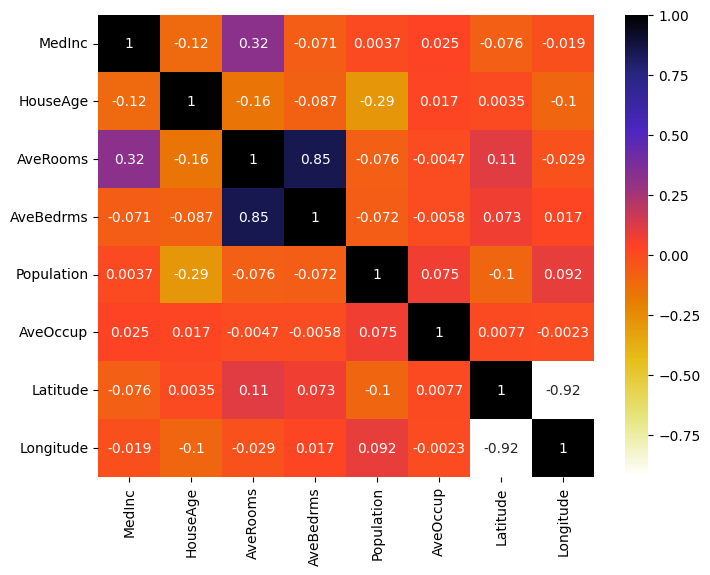

In [ ]:
import seaborn as sns
#Using Pearson Correlation technique for feature selection
plt.figure(figsize=(8,6))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r) # plotting heatmap
plt.show()

In [ ]:
# with the following function we can select highly correlated features and exclude them
# this is feature selection

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
# count of independent features correlated by more than 80%
corr_features = correlation(X_train, 0.8)
len(set(corr_features))

2

In [ ]:
corr_features

{'AveBedrms', 'Longitude'}

In [ ]:
# the above two features dropped to attain better model performance
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude
20046,1.6812,25.0,4.192201,1392.0,3.877437,36.06
3024,2.5313,30.0,5.039384,1565.0,2.679795,35.14
15663,3.4801,52.0,3.977155,1310.0,1.360332,37.80
20484,5.7376,17.0,6.163636,1705.0,3.444444,34.28
9814,3.7250,34.0,5.492991,1063.0,2.483645,36.62
...,...,...,...,...,...,...
17505,2.9545,47.0,4.195833,581.0,2.420833,37.36
13512,1.4891,41.0,4.551852,994.0,3.681481,34.11
10842,3.5120,16.0,3.762287,5014.0,2.369565,33.67
16559,3.6500,10.0,5.502092,5935.0,3.547519,37.82


## Data preprocessing

In [ ]:
# standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X_train=scaler.fit_transform(X_train)

In [ ]:
X_test=scaler.transform(X_test)

## Model fitting

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [ ]:
# model prediction testing
y_pred=regression.predict(X_test)

In [ ]:
y_pred

array([0.72604907, 1.76743383, 2.71092161, ..., 2.07465531, 1.57371395,
       1.82744133])

## Model Evaluation

In [ ]:
print('Coefficients:', regression.coef_)
print('Intercept:', regression.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, y_pred))


Coefficients: [ 8.49221760e-01  1.22119309e-01 -2.99558449e-01  3.48409673e-01
 -8.84488134e-04 -4.16980388e-02 -8.93855649e-01 -8.68616688e-01]
Intercept: 2.0692396089424165
Mean squared error (MSE): 0.53
Coefficient of determination (R^2): 0.60


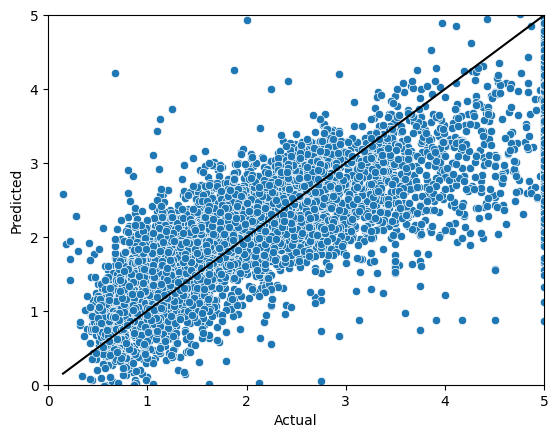

In [ ]:
# Plot the multiple linear regression graph
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

sns.scatterplot(x='Actual', y='Predicted', data=data)

x_range = np.linspace(data['Actual'].min(), data['Actual'].max(), 100)
y_range = x_range

plt.plot(x_range, y_range, color='black')

plt.xlim(0, 5)
plt.ylim(0, 5)

plt.show()